In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
!pip install opencv-python

In [5]:
img = cv2.imread('./images_dataset/lionel_messi/DdaglCTVQAEtWO4.jpg')
img.shape

(750, 608, 3)

(np.float64(-0.5), np.float64(607.5), np.float64(749.5), np.float64(-0.5))

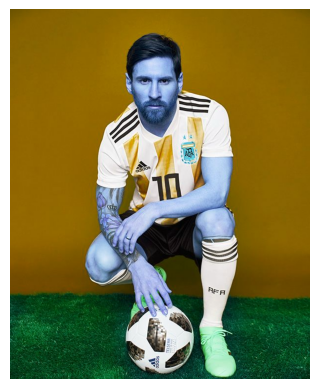

In [6]:

plt.imshow(img)
plt.axis('off') 

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(750, 608)

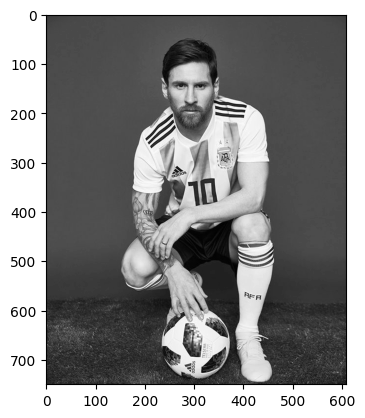

In [8]:
plt.imshow(gray, cmap='gray')

In [9]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')


In [10]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[235, 101, 117, 117]], dtype=int32)

In [11]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(235), np.int32(101), np.int32(117), np.int32(117))

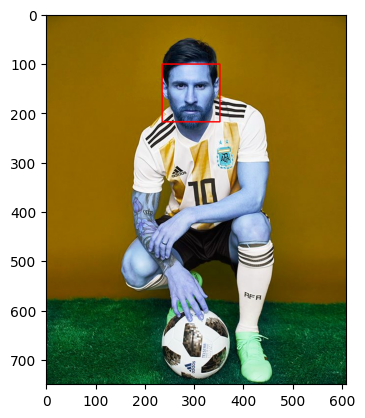

In [12]:

face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

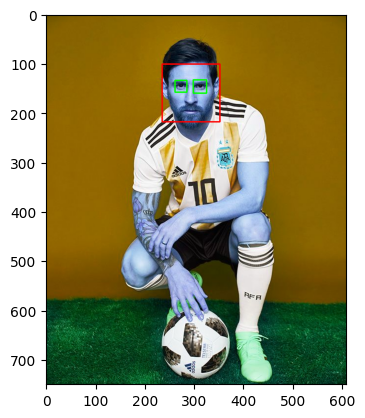

In [13]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

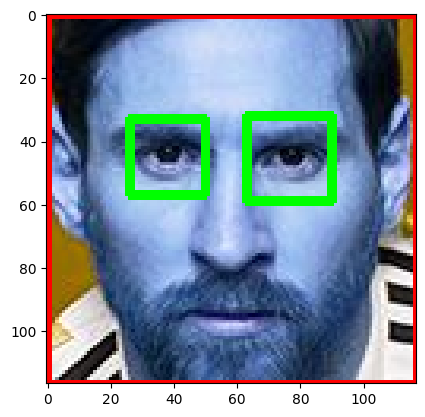

In [14]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

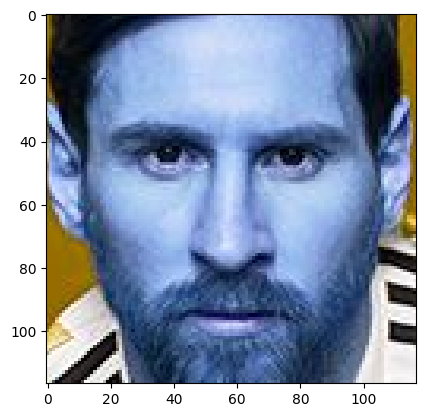

In [16]:
org_image_obstructed = get_cropped_image_if_2_eyes('./images_dataset/lionel_messi/DdaglCTVQAEtWO4.jpg')
plt.imshow(org_image_obstructed)

In [17]:
path_to_data = "./images_dataset/"
path_to_cr_data = "./images_dataset//cropped/"

In [18]:

import os


In [19]:

img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./images_dataset/cropped',
 './images_dataset/lionel_messi',
 './images_dataset/maria_sharapova',
 './images_dataset/roger_federer',
 './images_dataset/serena_williams',
 './images_dataset/virat_kohli']

In [21]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 

cropped
lionel_messi
Generating cropped images in folder:  ./images_dataset//cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./images_dataset//cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./images_dataset//cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./images_dataset//cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./images_dataset//cropped/virat_kohli


In [23]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./images_dataset//cropped/lionel_messi\\lionel_messi1.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi10.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi11.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi12.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi13.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi14.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi15.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi16.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi17.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi18.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi19.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi2.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi20.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi21.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi22.png',
  './images_dataset//cropp

In [25]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./images_dataset//cropped/lionel_messi\\lionel_messi1.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi10.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi11.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi12.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi13.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi14.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi15.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi16.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi17.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi18.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi19.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi2.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi20.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi21.png',
  './images_dataset//cropped/lionel_messi\\lionel_messi22.png',
  './images_dataset//cropp

In [26]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [33]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [32]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [30]:
!pip install PyWavelets


   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.2 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.2 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.5/4.2 MB 508.0 kB/s eta 0:00:08
   ---- ----------------------------------- 0.5/4.2 MB 508.0 kB/s eta 0:00:08
   ------- -------------------------------- 0.8/4.2 MB 516.0 kB/s eta 0:00:07
   ------- -------------------------------- 0.8/4.2 MB 516.0 kB/s eta 0:00:07
   --------- ------------------------------ 1.0/4.2 MB 524.3 kB/s eta 0:00:07
   --------- ------------------------------ 1.0/4.2 MB 524.3 kB/s eta 0:00:07
   --------- ------------------------------ 1.0/4.2 MB 524.3 kB/s eta 0:00:07
   ------------ ------------------------

In [31]:
!pip install git+https://github.com/PyWavelets/pywt.git


  Cloning https://github.com/PyWavelets/pywt.git to c:\users\ziad\appdata\local\temp\pip-req-build-xeahgq62
  Resolved https://github.com/PyWavelets/pywt.git to commit a65ad65ec9642040bd4cd85e07f4d4efadd4cb1e
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  Running command git clone --filter=blob:none --quiet https://github.com/PyWavelets/pywt.git 'C:\Users\ziad\AppData\Local\Temp\pip-req-build-xeahgq62'
  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [104 lines of output]
  + meson setup C:\Users\ziad\AppData\Local\Temp\pip-req-build-xeahgq62 C:\Users\ziad\AppData\Local\Temp\pip-req-build-xeahgq62\.mesonpy-vjrltm97 -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\ziad\AppData\Local\Temp\pip-req-build-xeahgq62\.mesonpy-vjrltm97\meson-python-native-file.ini
  The Meson build system
  Version: 1.5.1
  Source dir: C:\Users\ziad\AppData\Local\Temp\pip-req-build-xeahgq62
  Build dir: C:\Users\ziad\AppData\Local\Temp\pip-req-build-xeahgq62\.mesonpy-vjrltm97
  Build type: native build
  Project name: PyWavelets
  Project version: 1.7.0.dev0
  C compiler for the host machine: cc (gcc 13.2.0 "cc (Rev3, Built by MSYS2 project) 13.2.0")
  C li

In [34]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(186, 4096)

In [39]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8936170212765957

In [67]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.80      0.89      0.84         9
           2       0.67      0.80      0.73         5
           3       0.88      0.78      0.82         9
           4       1.00      1.00      1.00        14

    accuracy                           0.89        47
   macro avg       0.87      0.87      0.87        47
weighted avg       0.90      0.89      0.90        47



In [68]:

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [72]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,4,5,10,15]
        }
    }
}

In [73]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\ziad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ziad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ziad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ziad\AppData\Local\Programs\Python\Pytho

,model,best_score,best_params
0,svm,0.761905,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,logistic_regression,0.790741,{'logisticregression__C': 4}


In [77]:
best_estimators['svm'].score(X,y)

0.967741935483871

In [76]:
best_estimators['logistic_regression'].score(X,y)


0.967741935483871

In [78]:
best_clf = best_estimators['logistic_regression']

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 9,  0,  0,  1,  0],
       [ 0,  8,  0,  1,  0],
       [ 0,  1,  4,  0,  0],
       [ 0,  1,  1,  7,  0],
       [ 0,  0,  1,  0, 13]])

Text(95.72222222222221, 0.5, 'Truth')

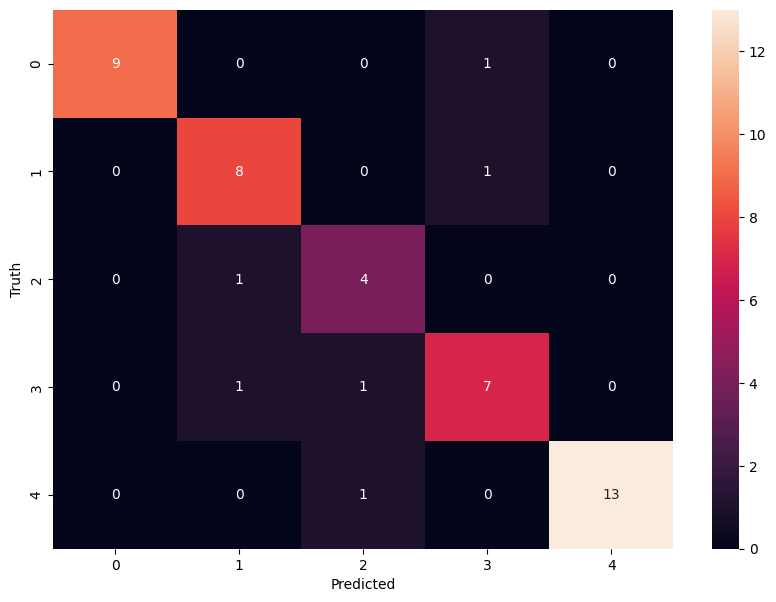

In [80]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [81]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [82]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [83]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))